In [6]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import GridSearchCV

In [2]:
model_1 = pd.read_excel('C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/model1_dataset.xlsx',sheet_name='Sheet1')
model_1

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,1
...,...,...,...,...,...,...,...,...,...
4752,C114658,-2521120.0,M,55,19.045073,74.0,70,120,1
4753,C117461,815720.0,M,50,26.423570,88.0,70,110,0
4754,C123990,331180.0,F,55,20.569330,85.0,80,120,0
4755,C126693,-1597780.0,F,50,22.718974,73.0,80,120,1


In [1]:
model_1 = pd.get_dummies(model_1.drop('customer_id',axis=1))

NameError: name 'pd' is not defined

In [ ]:
model_1_y = model_1['risk']
model_1_x = model_1.drop(['insu_risk_expense','risk'], axis =1, inplace = False)

In [4]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(model_1_x, model_1_y,\
                                               test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (3329, 7)
train data Y size : (3329,)
test data X size : (1428, 7)
test data X size : (1428,)


In [19]:
tree_uncustomized = GradientBoostingClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on traing set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on traing set: 0.634
Score on test set: 0.547


In [20]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.571,0.551
1,20,0.572,0.550
2,30,0.573,0.555
3,40,0.590,0.541
4,50,0.592,0.547
5,60,0.607,0.546
6,70,0.618,0.544
7,80,0.628,0.544
8,90,0.633,0.548
9,100,0.634,0.547


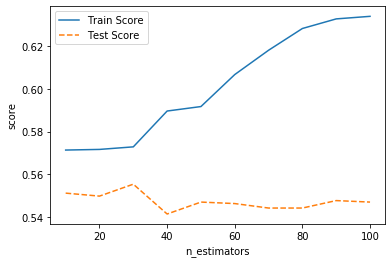

In [21]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [22]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(n_estimators=30, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.573,0.555
1,2,0.577,0.551
2,3,0.576,0.549
3,4,0.578,0.550
4,5,0.577,0.545
5,6,0.573,0.545
6,7,0.588,0.547
7,8,0.583,0.551
8,9,0.575,0.550
9,10,0.579,0.546


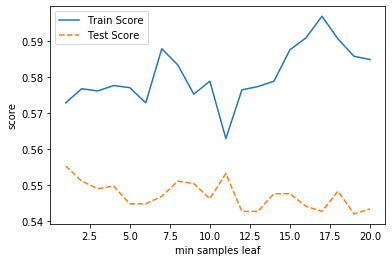

In [23]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [24]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(n_estimators=30, min_samples_leaf=8,
             min_samples_split=v_min_samples_split,
             random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,2,0.583,0.551
1,4,0.583,0.551
2,6,0.583,0.551
3,8,0.583,0.551
4,10,0.583,0.551
5,12,0.583,0.551
6,14,0.583,0.551
7,16,0.583,0.551
8,18,0.583,0.551
9,20,0.583,0.551


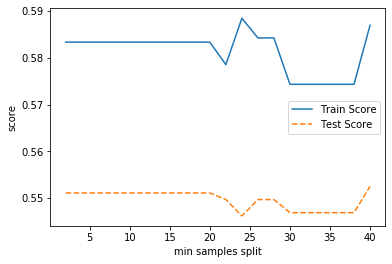

In [25]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [26]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(n_estimators=30, min_samples_leaf=8, min_samples_split=20,
             max_depth=v_max_depth, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.547,0.555
1,2,0.556,0.552
2,3,0.583,0.551
3,4,0.612,0.555
4,5,0.633,0.542
5,6,0.668,0.540
6,7,0.700,0.532
7,8,0.737,0.529
8,9,0.749,0.515
9,10,0.773,0.532


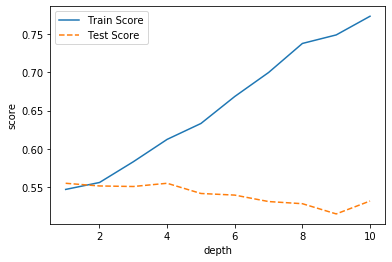

In [27]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

In [30]:
train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators=30, min_samples_leaf=8, min_samples_split=20,
             max_depth=4,learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate']= para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.612,0.555
1,0.2,0.649,0.539
2,0.3,0.666,0.542
3,0.4,0.676,0.517
4,0.5,0.678,0.537
5,0.6,0.691,0.525
6,0.7,0.709,0.502
7,0.8,0.695,0.513
8,0.9,0.704,0.526


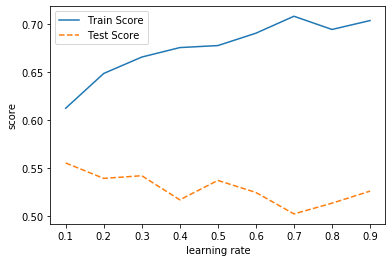

In [31]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [34]:
# 모델 생성
gb_final = GradientBoostingClassifier(n_estimators=30, min_samples_leaf=8, min_samples_split=20,
             max_depth=4,learning_rate = 0.3 , random_state=1234)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.666
Score on test set: 0.542


In [36]:
y_pred = svc_final.predict(df_test_x)
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)